<h1 align='center' style="color: blue;">Big Data Analytics Project - Spotify (Song Prediction - Hit/Flop) </h1>

### Business Problem:

Spotify, is a digital music, podcast, and video service that gives access to millions of songs and other content  creators all over the world. Spotify aims to provide more successful songs to its platform in order to draw in and keep more customers in light of the growing competition and demand. To determine whether a song will become a hit or not, users are looking to use the dataset and to utilize machine learning and deep learning models to access  data resources and prioritise the efforts for prediction. We therefore set out to find which characteristics are the best indicators of a hit song and to concentrate on those characteristics while curating Spotify's collections list. We also set out to establish the threshold probability of a hit song to be used when choosing new songs for the platform.

### About the data:

This dataset consists of features for tracks (1960's - 2010's) fetched using Spotify's Web API. 
The tracks are labeled '1' or '0' ('Hit' or 'Flop'). This dataset can be used to make a classification model that predicts whether a track would be a 'Hit' or not.

Note:
'Flop' here merely implies that it is not a song that probably could not be considered popular in the mainstream. It does not objectively considers a track inferior, bad or a failure if its labeled 'Flop'.

### Data Understanding (features/labels):

- track: The Name of the track.

- artist: The Name of the Artist.

- uri: The uniform resource identifier for the track.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

### Data Processing:

- Dataset being thoroughly checked for null and duplicate counts and successfully addressed them.
- Dataset has mixed types of features (numerical/catogorical/discrete).
- Visualized the data for its patterns and skewness by implementing various exploratory data analysis methods.
- Project aimed at building classification model with a binary outcome of '1' or '0' ('Hit' or 'Flop').

### Data Modeling:

- Several models were attempted in addressing this problem, increasing in complexity. 
- First, to get a sense for what a untrained model would perform like, we used a dummy classifier (baseline model) to make predictions according to the majority class of the training data. 
-  Second, iterated through several Machine Learning models (Random Forest, Logistic Regression, XGBoost etc)
- Third, implemented Deep Learning models (Convolutional Neural Network, Multilayer Perceptron - MLP, Dense Neural Network etc).
- Tools/applications used for this were Google collab and Jupyter Notebook.

### Evaluation:

- Models performance was evaluated using accuracy and ROC-AUC scores.
- Implemented feature importance and shaply to determine the importance of the data features.


<h2 align='center' style="color: blue;">Importing libraries and working with the data</h2>

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [35]:
# loading the data

df_60 = pd.read_csv("dataset-of-60s.csv")
df_70 = pd.read_csv("dataset-of-70s.csv")
df_80 = pd.read_csv("dataset-of-80s.csv")
df_90 = pd.read_csv("dataset-of-90s.csv")
df_00 = pd.read_csv("dataset-of-00s.csv") 
df_10 = pd.read_csv("dataset-of-10s.csv")

In [36]:
df_60.shape, df_70.shape, df_80.shape, df_90.shape, df_00.shape, df_10.shape

((8642, 19), (7766, 19), (6908, 19), (5520, 19), (5872, 19), (6398, 19))

In [37]:
# concating the above files into one single dataframe

df = pd.concat([df_60, df_70, df_80, df_90, df_00, df_10])

In [38]:
df.shape

(41106, 19)

In [39]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [38]:
df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

### Data description:

In [11]:
df.info

<bound method DataFrame.info of                       track            artist  \
0     Jealous Kind Of Fella     Garland Green   
1             Initials B.B.  Serge Gainsbourg   
2              Melody Twist       Lord Melody   
3             Mi Bomba Sonó        Celia Cruz   
4               Uravu Solla       P. Susheela   
...                     ...               ...   
6393          Lotus Flowers             Yolta   
6394      Calling My Spirit       Kodak Black   
6395          Teenage Dream        Katy Perry   
6396         Stormy Weather    Oscar Peterson   
6397                   Dust       Hans Zimmer   

                                       uri  danceability  energy  key  \
0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3   
1     spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   
2     spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   
3     spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   
4     spotify:

In [12]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [13]:
#df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

In [12]:
df.nunique(axis=0)

track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
dtype: int64

<h2 align='center' style="color: blue;">Checking for missing/null/duplicate values</h2>

### Checking for duplicates

In [93]:
df.duplicated().sum()

420

In [94]:
df = df.drop_duplicates()

In [95]:
df.shape

(40686, 19)

### Checking the missing values or null values count

In [97]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
track,0,0.0
instrumentalness,0,0.0
sections,0,0.0
chorus_hit,0,0.0
time_signature,0,0.0
duration_ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
acousticness,0,0.0


<h2 align='center' style="color: blue;">Exploratory Data Analysis - EDA</h2>

### Extracting catogorical columns in the data

In [94]:
categorical_cols=df.columns[df.dtypes =='object']
print(len(categorical_cols))

2


In [95]:
catogorical_features = []
for features in df.columns:
    if df[features].dtypes == "O":     # O - object type
        catogorical_features.append(features)
        
print(catogorical_features)

['track', 'uri']


### Extracting numerical columns in the data

In [96]:
len(df._get_numeric_data().columns)

17

In [97]:
# df._get_numeric_data().columns

In [98]:
numerical_features = []
for features in df.columns:
    if df[features].dtypes != "O":
        numerical_features.append(features)
        
print(numerical_features)

['artist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target']


### Extracting discrete columns from the above numerical columns

In [99]:
discrete_feature = []
for feature in numerical_features:
    if len(df[feature].unique()) < 15:
        discrete_feature.append(feature)
        
print(discrete_feature)

['key', 'mode', 'time_signature', 'target']


In [100]:
# verifying the above

In [101]:
set(df['target'])

{0, 1}

In [102]:
set(df['mode'])

{0, 1}

In [103]:
set(df['time_signature'])

{0, 1, 3, 4, 5}

In [104]:
set(df['key'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [105]:
len(set(df['danceability']))

1048

In [106]:
len(set(df['acousticness']))

4194

### Understanding the impact of discrete values on target variable

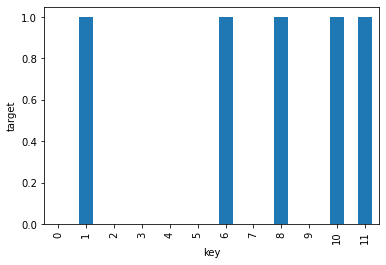

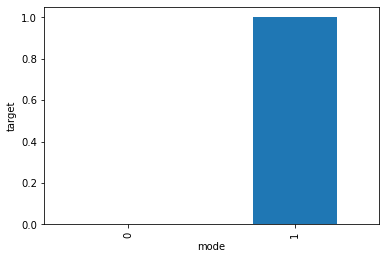

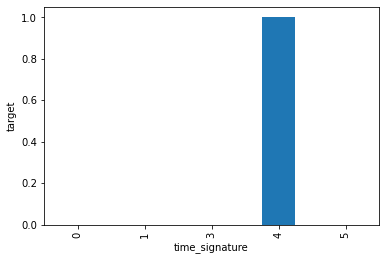

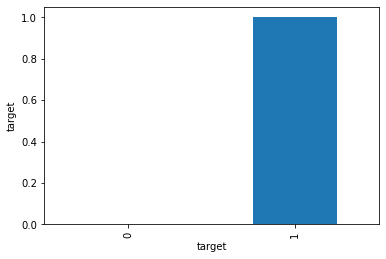

In [107]:
for feature in discrete_feature: 
    discrete_data = df.copy()
    discrete_data.groupby(feature)["target"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.show()

### Extracting and plotting continuous columns from numercial columns

In [108]:
continuous_feature=[]
for feature in numerical_features:
    if feature not in discrete_feature:
        continuous_feature.append(feature)
        
print(continuous_feature)

['artist', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections']


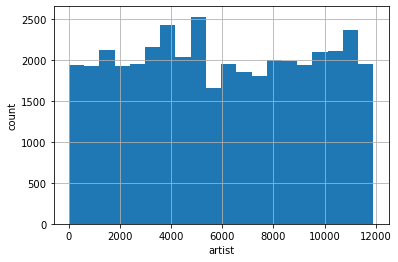

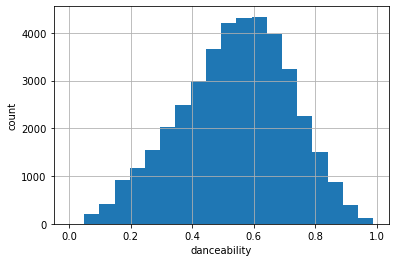

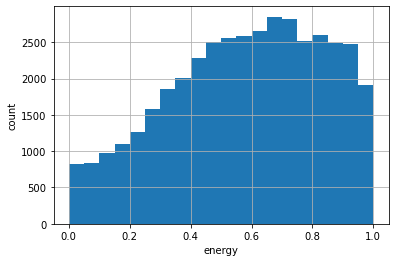

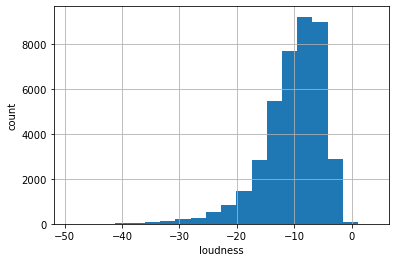

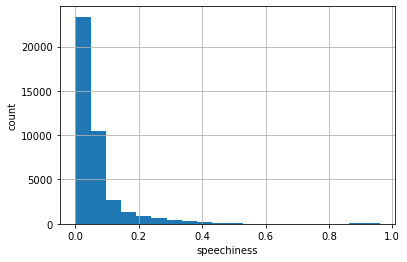

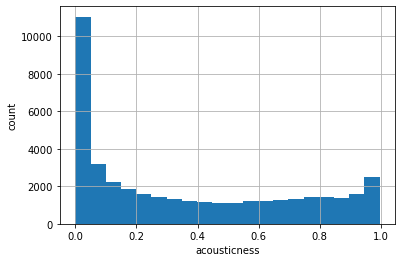

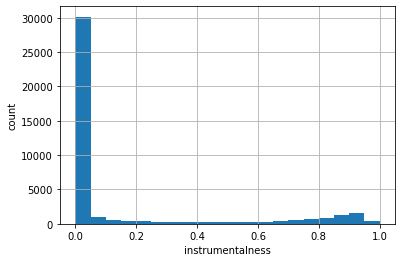

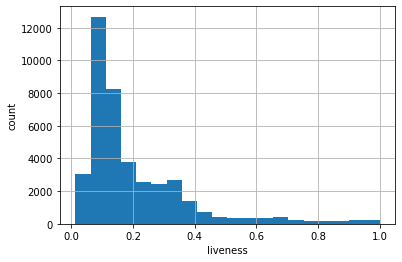

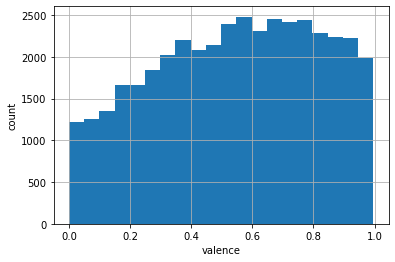

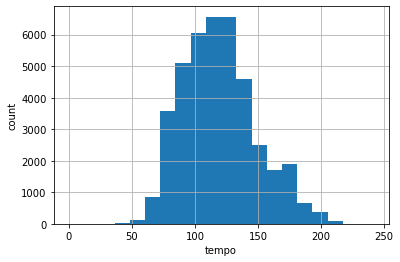

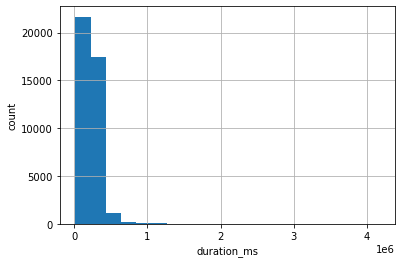

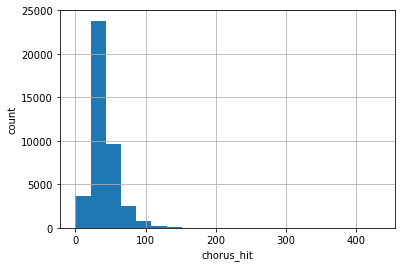

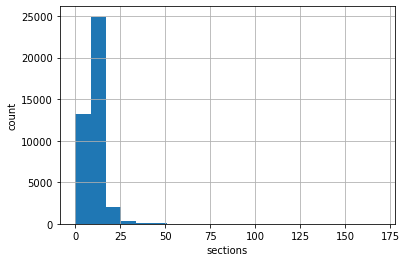

In [109]:
for feature in continuous_feature: 
    cont_data = df.copy()
    cont_data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

In [110]:
# transforming skewed features to log transform
# features to be transformed:
# 'energy', 'loudness', 'speechiness', 'acousticness', 
# 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections'

In [111]:
# log_trans_features = ['energy', 'loudness', 'speechiness', 'acousticness', 
#                       'instrumentalness', 'liveness', 'valence', 
#                       'duration_ms', 'chorus_hit', 'sections']

# for feature in log_trans_features: 
#     df[feature] = np.log(df[feature])
#     df[feature].hist(bins=100)
#     plt.xlabel(feature)
#     plt.ylabel("counts")
#     plt.show()

### Transforming the skewed variables using log transform

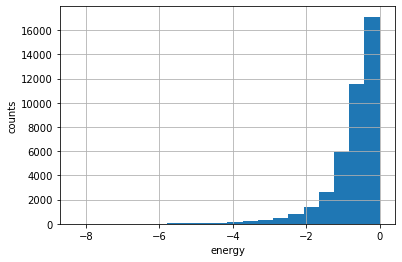

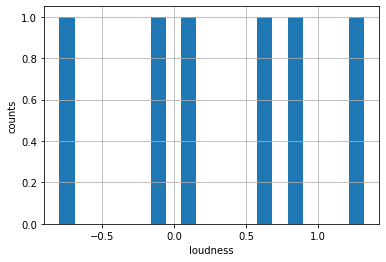

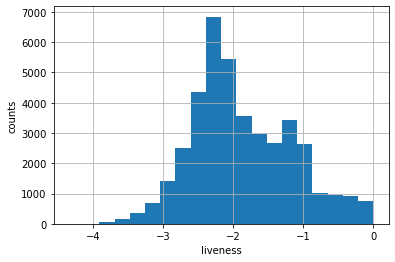

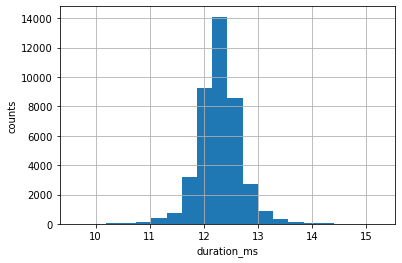

In [112]:
for feature in continuous_feature: 
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.ylabel("counts")
        plt.show()

### Checking outliers

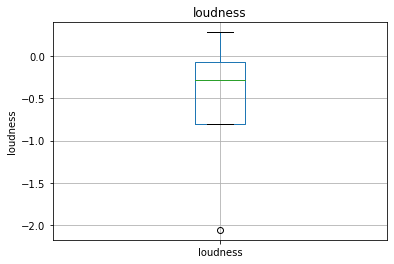

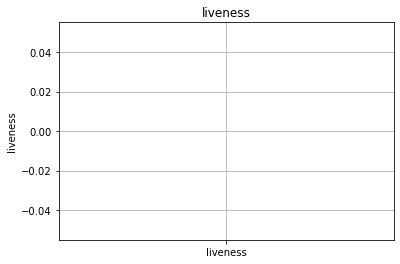

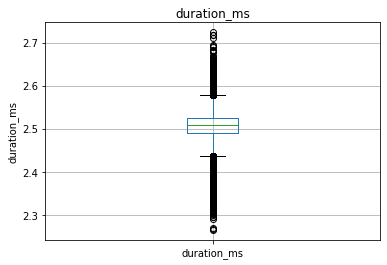

In [113]:
for feature in continuous_feature: 
    cont_data_outliers = df.copy()
    if 0 in cont_data_outliers[feature].unique():
        pass
    else:
        cont_data_outliers[feature] = np.log(df[feature])
        cont_data_outliers.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Text(0.5, 1.0, 'Distribution of predictors with outliers')

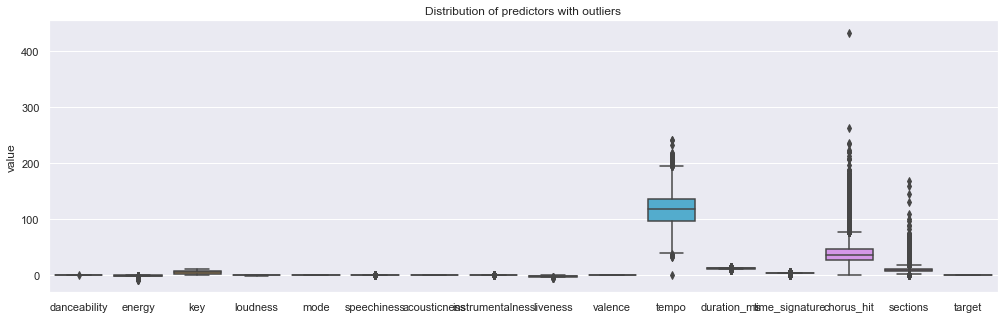

In [114]:
#box plot with outliers
df_new = df.drop(['track', 'artist', 'uri'], axis=1)
df_melt=pd.melt(df_new)
df_melt
sns.set(rc={'figure.figsize':(17,5)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

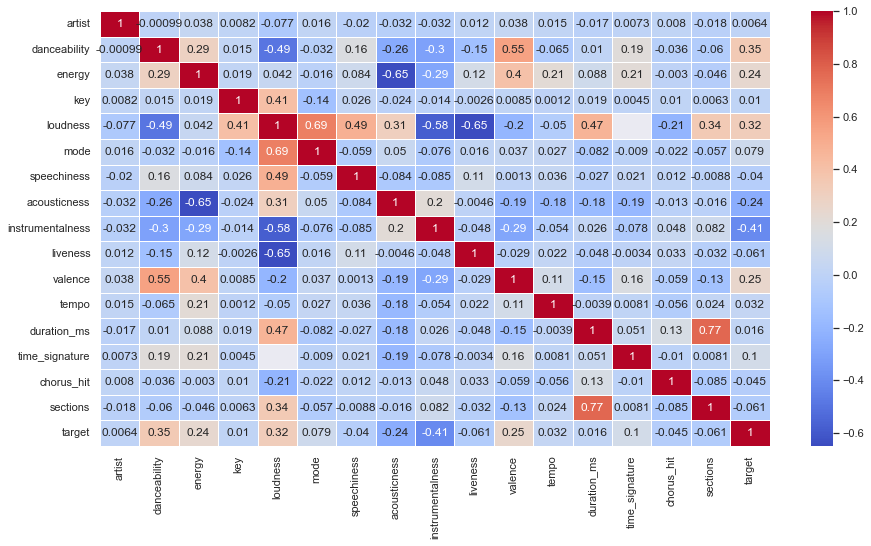

In [116]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths = .6)
plt.show()

### Extracting highly correlated features

In [117]:
def correlation(dataset, threshold): 
    col_corr = set()                 # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [118]:
correlation_features = correlation(df,0.7)
correlation_features

{'sections'}

In [119]:
# can drop the highly correlated columns from above

### Checking the count of categorical features

In [120]:
for feature in catogorical_features:
    print("The Feature is {} and the no of categories are: {}".format(feature,len(df[feature].unique())))

The Feature is track and the no of categories are: 35860
The Feature is uri and the no of categories are: 40560


### Converting the feature 'artist' to numerical

In [40]:
df['artist'] = pd.Categorical(df['artist']).codes

In [41]:
set(df['artist'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [42]:
df['artist'].head()

0    3817
1    9050
2    6268
3    1837
4    7778
Name: artist, dtype: int16

In [43]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,3817,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,9050,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,6268,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,1837,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,7778,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


<h2 align='center' style="color: blue;">Data Visualization</h2>

### Histogram

Histogram - displaying the distribution of all features in the dataset

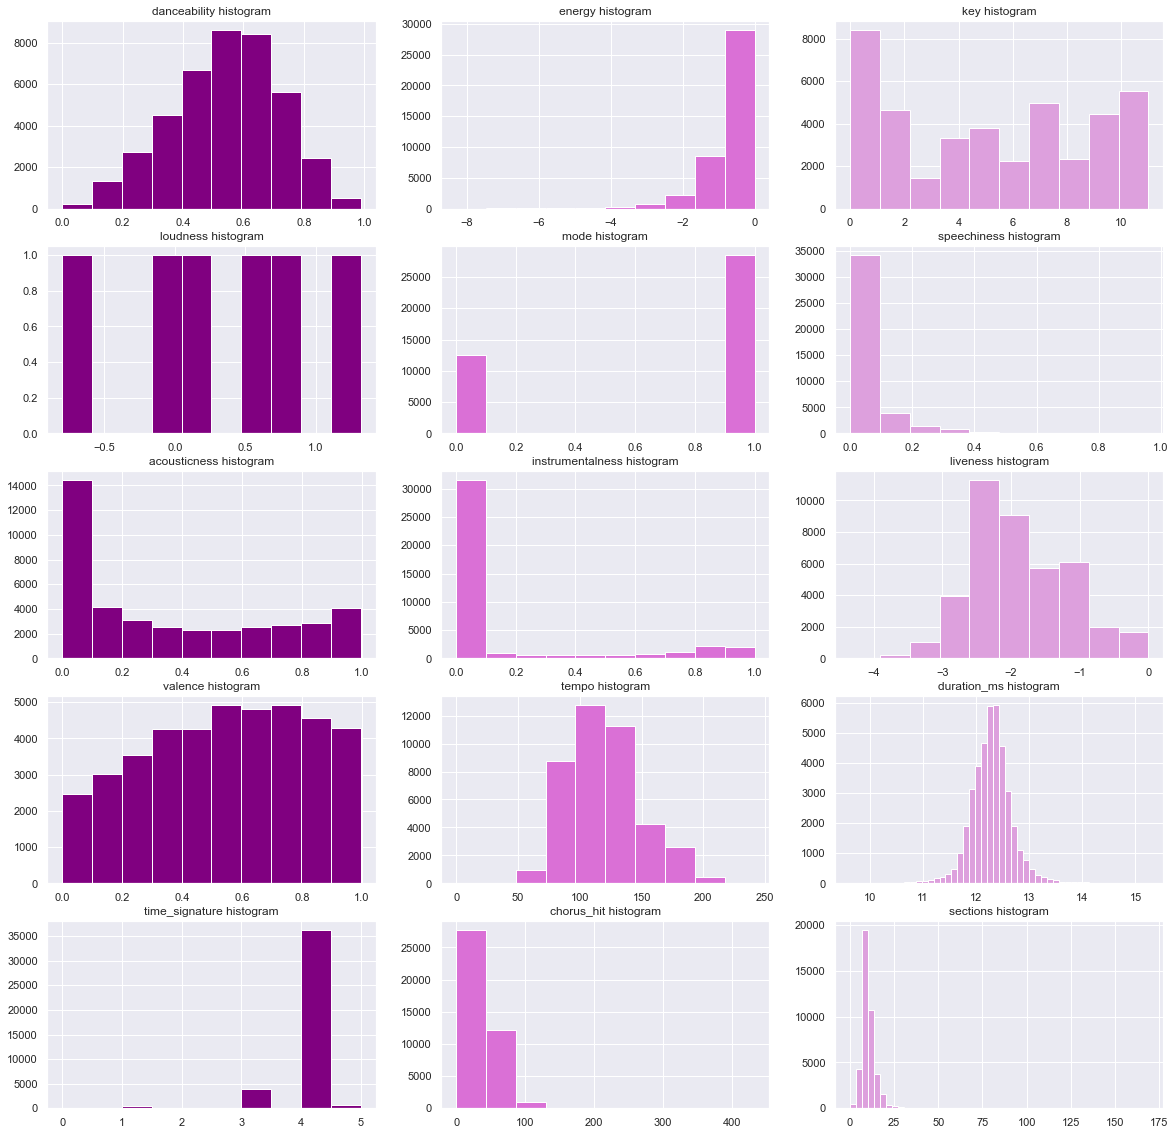

In [59]:
#create histograpms of all the features to see distributions
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'purple')
hist_plot(4,1, 'chorus_hit', 10, 'orchid')
hist_plot(4,2, 'sections', 50, 'plum')

plt.show()

### Bar plot

Bar Plot - to understand the distribution of top 30 artists and their hit songs with respect to average duration

In [61]:
# df.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for all decades", legend = None)
# plt.ylabel('Feature importance')
# plt.show()

In [62]:
# plt.rcParams["figure.figsize"] = (20,20)
# sns.barplot(y = df['artist'], x = df['loudness'], palette='rocket_r')
# plt.title('Top 30 Artist heard')
# plt.show()

In [63]:
# import plotly.express as px   #importing plotly
# fig2 = px.scatter(df, x="danceability", y="artist")
# fig2.show()

### Visualizing top 10 artists with hit tracks

In [64]:
artists_popularity = df.sort_values(by=['target'], ascending=False).reset_index()
artists_popularity[:10]

,index,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,Jealous Kind Of Fella,3817,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,-0.478036,3,NaN,1,0.0403,0.490000,0.000000,-2.552329,0.845,185.655,12.064123,3,32.94975,9,1
1,6457,Europa And The Pirate Twins,10884,spotify:track:5wMd1Bpd8NOSlWGWCNvLuL,0.566,-0.334075,0,NaN,1,0.0322,0.011400,0.013500,-1.378326,0.902,99.820,12.201663,4,32.03460,10,1
2,6451,Cult Of Personality,6208,spotify:track:5e3YOg6fIkP0wD5TyxcHOH,0.504,-0.085558,0,NaN,1,0.0517,0.001640,0.000021,-0.248461,0.539,92.031,12.594144,4,59.90462,10,1
3,6450,A Woman Needs Love (Just Like You Do),8408,spotify:track:0DEwNI2DgasX1eprqCivJk,0.744,-0.978166,6,NaN,0,0.0395,0.479000,0.000039,-1.370421,0.696,91.113,12.425421,4,33.64557,12,1
4,6449,Jackie Brown,5135,spotify:track:37zFCQlcLHzi94fJYSvMo7,0.529,-0.183923,4,NaN,1,0.0297,0.006200,0.043300,-1.742969,0.609,167.041,12.400928,4,31.98072,14,1
5,6444,Take It Easy On Me,6196,spotify:track:0UPJDZxXDPp7YR8hLt9CSo,0.405,-0.616186,9,NaN,1,0.0325,0.047600,0.000017,-0.850971,0.280,122.395,12.318687,4,25.64283,12,1
6,6443,Getcha Back,9951,spotify:track:0gRFT4DkEpiYuSc2KlebWF,0.627,-0.099820,1,NaN,0,0.0480,0.823000,0.000012,-1.142564,0.701,114.967,12.108972,4,23.98650,8,1
7,6442,"Come On, Let's Go",6312,spotify:track:7lAVmqRbm79nGN4auDjJ9b,0.410,-0.205795,9,NaN,1,0.0373,0.104000,0.006130,-2.344449,0.766,176.350,11.694914,4,31.17711,5,1
8,6439,Girl I'm Gonna Miss You,7081,spotify:track:1ffAMndLMFbKHpXuIDBwc1,0.754,-0.791863,9,NaN,1,0.0443,0.099800,0.004870,-2.225624,0.758,151.239,12.383549,4,26.00406,13,1
9,6438,One Night Love Affair,1556,spotify:track:5W2wzbDu4os7SbAGVzbYfY,0.519,-0.168419,6,NaN,0,0.0374,0.000515,0.000002,-0.978166,0.609,124.624,12.517524,4,42.48000,10,1


### Grouping and merging

In [65]:
# grouping the dataset as per artist name and counting the songs per artist
artist_length = df.groupby('artist',as_index=False).sum()
artist_song_cnt = df.groupby('artist',as_index=False).agg({"track": "nunique"})

# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artist',copy=False)
artist_length_uniqsong.rename(columns={'track':'unique_track_number'},inplace=True)

In [66]:
# unique_track_number is the column with count of tracks per artist
artist_length_uniqsong.head()

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,unique_track_number
0,0,7.343,-4.028217,55,0.0,6,0.7466,1.40006,0.001791,-22.621463,8.129,1321.595,121.907725,40,428.03348,93,10,10
1,1,0.984,-1.823783,17,0.0,1,0.1160,1.28800,0.000000,-4.797930,0.597,271.474,24.784383,7,56.11945,21,0,2
2,2,1.296,-1.856817,7,0.0,2,0.9410,1.05100,0.000000,-3.587942,1.193,258.859,25.049161,8,81.74584,21,0,2
3,3,0.750,-1.173974,22,0.0,2,0.0822,0.79600,0.000000,-4.695165,0.796,223.648,25.020929,8,50.78180,22,2,1
4,4,2.713,-2.887454,20,0.0,4,0.1847,0.73730,0.185258,-9.966285,2.804,533.430,62.142019,20,177.47171,58,5,5


In [67]:
set(artist_length_uniqsong['unique_track_number'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 60,
 61,
 62,
 63,
 66,
 68,
 69,
 73,
 86,
 87,
 111,
 122,
 127,
 130,
 134,
 186}

In [68]:
artist_length_uniqsong_top_30 = artist_length_uniqsong['artist'].head(30)

### Visualizing top 30 artist

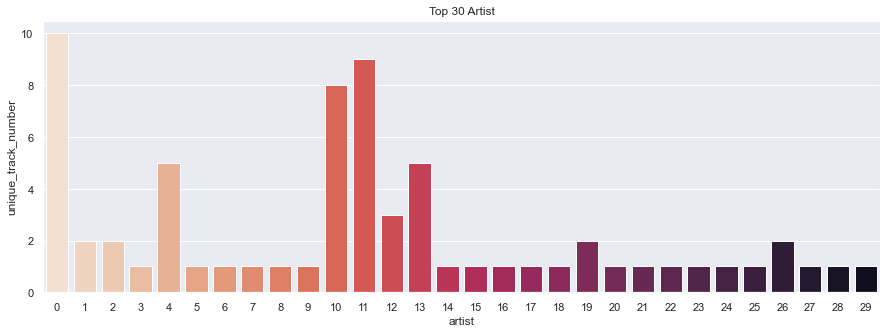

In [69]:
# barplot artist vs unique_track_number
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x = artist_length_uniqsong_top_30, y = artist_length_uniqsong['unique_track_number'], palette='rocket_r')
plt.title('Top 30 Artist')
plt.show()

In [70]:
# sorting the df by duration_ms of the track
max_duration  = artist_length_uniqsong.sort_values(by=['duration_ms'])

# top 30 with max duration_ms of hit songs
high_duration_ms = max_duration.head(30)

In [71]:
high_duration_ms.head()

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,unique_track_number
10913,10913,0.211,-0.426178,2,0.0,1,0.0772,0.000174,0.000,-0.543005,0.000,152.211,9.675331,4,0.0,2,0,1
10904,10904,0.511,-0.879477,2,0.0,1,0.8220,0.894000,0.000,-0.035627,0.520,99.449,10.049015,5,0.0,2,0,1
3512,3512,0.368,-0.105361,6,0.0,0,0.0599,0.001800,0.889,-1.309333,0.346,138.358,10.223141,3,0.0,2,0,1
3260,3260,0.336,-0.606969,1,0.0,1,0.0981,0.789000,0.000,-0.843970,0.265,86.013,10.366813,4,0.0,2,0,1
8469,8469,0.180,-0.149661,9,0.0,1,0.0826,0.000182,0.640,-1.987774,0.629,113.402,10.462332,4,0.0,1,0,1


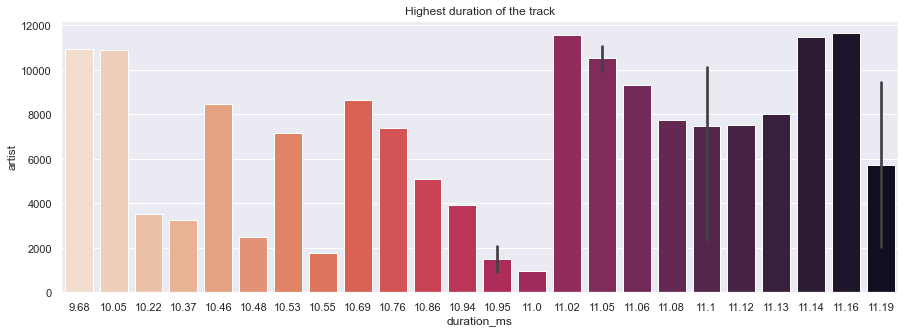

In [72]:
# barplot artist vs duration_ms
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(y = high_duration_ms['artist'], x = round(high_duration_ms['duration_ms'],2), palette='rocket_r')
plt.title('Highest duration of the track')
plt.show()

### Line plot

Line plot - to understand the distribution of all data features with respect to artist (to determine the hit songs)

In [44]:
# line plot for song trends based on artist (taking mean of all features and sorted per artist)

song_trend_per_artist = df[["artist","duration_ms","acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness"]].\
groupby("artist").mean().sort_values(by="artist").reset_index()

song_trend_per_artist.head()

,artist,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,0,199688.0,0.140006,0.7343,0.6847,0.000179,0.13715,132.1595,0.8129,-9.6154,0.07466
1,1,240933.5,0.644000,0.4920,0.4545,0.000000,0.09190,135.7370,0.2985,-8.1225,0.05800
2,2,275400.0,0.525500,0.6480,0.4130,0.000000,0.20840,129.4295,0.5965,-11.2385,0.47050
3,3,271160.0,0.398000,0.3750,0.5560,0.000000,0.09560,111.8240,0.3980,-7.2010,0.04110
4,4,250778.6,0.147460,0.5426,0.5674,0.037052,0.24210,106.6860,0.5608,-11.6634,0.03694


### Line Plot (feature 'duration_ms' with 'artist')

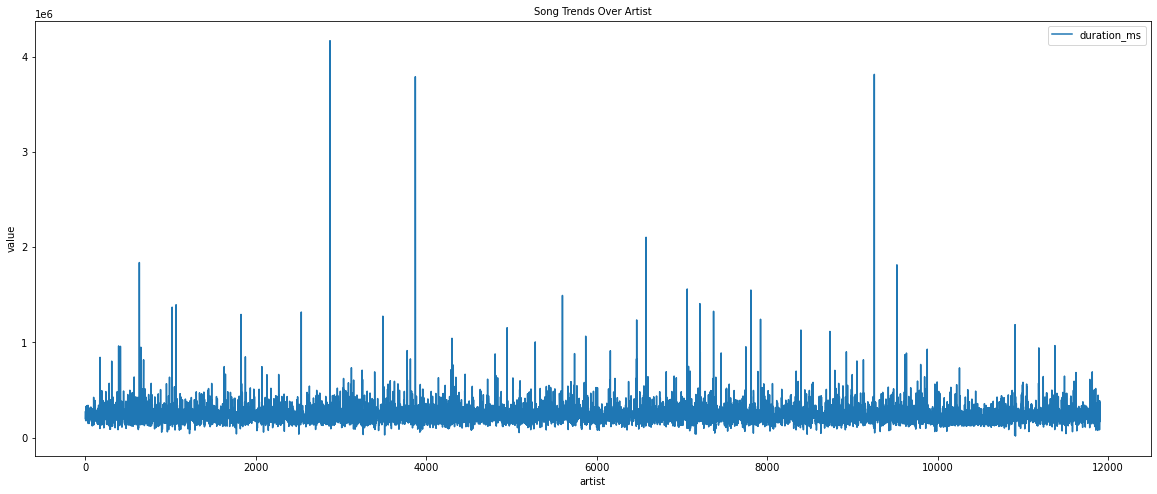

In [45]:
# Create a line plot
plt.figure(figsize=(20,8))
plt.title("Song Trends Over Artist", fontdict={"fontsize": 10})

# lines = ["acousticness","danceability","energy", 
#          "instrumentalness", "liveness", "valence", "speechiness"]

lines = ["duration_ms"]

for line in lines:
    ax = sns.lineplot(x='artist', y=line, data=song_trend_per_artist)
    
    
plt.ylabel("value")
plt.legend(lines)

### Line Plot (all features with 'artist')

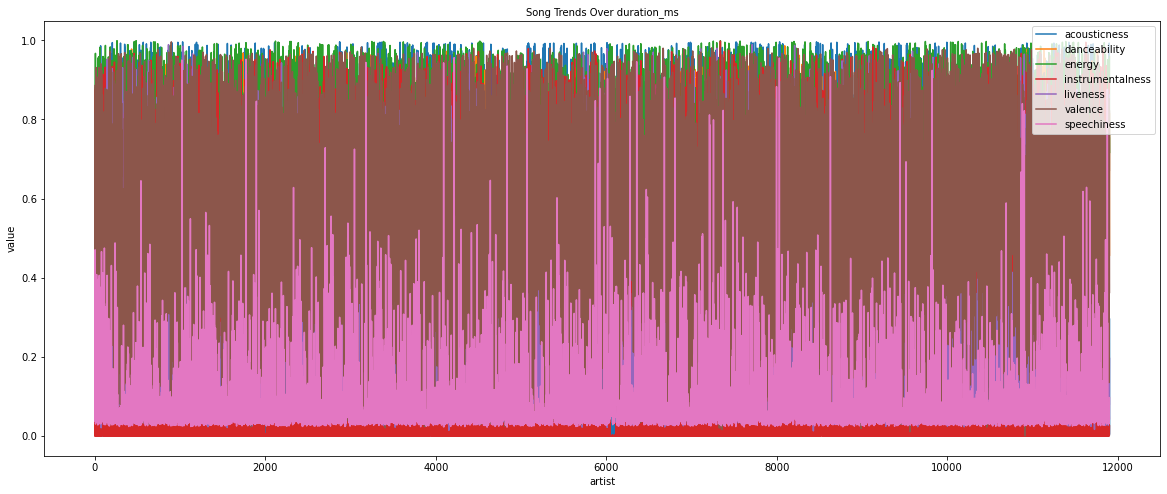

In [47]:
# Create a line plot
plt.figure(figsize=(20,8))
plt.title("Song Trends Over duration_ms", fontdict={"fontsize": 10})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

# lines = ["duration_ms"]

for line in lines:
    ax = sns.lineplot(x='artist', y=line, data=song_trend_per_artist)
    
    
plt.ylabel("value")
plt.legend(lines)

In [75]:
# artist with most songs

In [76]:
df["artist"].nunique()

11904

In [77]:
# Top 10 artists with most songs
df["artist"].value_counts()[:10]

11091    207
4235     140
7778     130
3259     128
4893     124
11362    116
574      109
3948      88
3645      80
8335      79
Name: artist, dtype: int64

In [78]:
artist_list = df['artist'].value_counts().index[:10]

df_artist = df[df['artist'].isin(artist_list)][["artist","duration_ms"]].\
groupby(["artist","duration_ms"]).size().reset_index(name="song_count")

df_artist.head()

,artist,duration_ms,song_count
0,574,11.455296,1
1,574,11.469318,1
2,574,11.670160,1
3,574,11.732760,1
4,574,11.747223,1


### Line plot (songs count against 'duration_ms')

<AxesSubplot:xlabel='duration_ms', ylabel='song_count'>

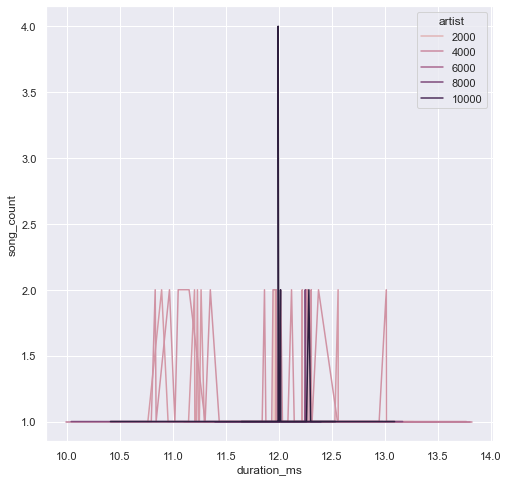

In [79]:
plt.figure(figsize=(8,8))
sns.lineplot(x="duration_ms", y="song_count", hue="artist", data=df_artist)

<h2 align='center' style="color: blue;">Model Preparation - Machine Learning</h2>

In [247]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


### Defining predictor (X) and target (y) variables

In [248]:
X = df.drop(columns=['artist','track','uri','loudness', 'target'],axis = 1)
y = df['target']

In [249]:
X.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.417,0.620,3,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9
1,0.498,0.505,3,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10
2,0.657,0.649,5,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12
3,0.590,0.545,7,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8
4,0.515,0.765,11,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14


In [250]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [251]:
X.shape,y.shape

((41106, 14), (41106,))

### Scaling the data

In [252]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state=18)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.80, random_state=18)


In [253]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape,X_test.shape,y_test.shape

((24663, 14), (3288, 14), (24663,), (3288,), (13155, 14), (13155,))

In [254]:
#scale our data
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)
#now scale xtest using the same scaler
x_test_scaled = scaler.transform(X_test)

### Baseline Model

In [135]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score 

dummy = DummyClassifier(random_state=42)
dummy.fit(x_train_scaled, y_train)
dummypreds = dummy.predict(x_val_scaled)

print(f"Dummy Accuracy: {accuracy_score(y_val, dummypreds)}")
print(f"Dummy ROC-AUC: {roc_auc_score(y_val, dummypreds)}")

Dummy Accuracy: 0.49635036496350365
Dummy ROC-AUC: 0.5


The dummy classifier has an accuracy of 0.496 and an ROC-AUC score of 0.5, indicating that it performs no better than random chance and is not a useful model for predicting whether a song will become a hit or not. This underscores the importance of developing more effective machine learning models using the Spotify Hit Predictor dataset.

### Random Forest classifier

In [136]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(x_train_scaled, y_train)
y_pred=rf_model.predict(x_test_scaled)
acc= round(rf_model.score(x_train_scaled, y_train) * 100, 2)
print (f"Accuracy train: {acc} %")

Accuracy train: 99.96 %


The Random Forest model achieved a training accuracy of 99.96%, which indicates that it is potentially overfitting to the training data. It may have learned the noise and patterns of the training data too well, and may not generalize well to new data. 

### Logistic Regression with L1 (Lasso)

In [112]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression object with L1 penalty
logreg = LogisticRegression(penalty='l1', solver='saga', C=0.1)

# fit the model on the training data
logreg.fit(x_train_scaled, y_train)

# evaluate the model on the test data
score = logreg.score(x_val_scaled, y_val)


In [113]:
print(f"Logistic with penalty l1 (lasso) score: {score * 100}")

Logistic with penalty l1 (lasso) score: 71.7357910906298


The logistic regression model with L1 penalty (Lasso regularization) achieved a score of 71.74%, indicating that it has moderate predictive ability for identifying whether a song will become a hit or not. Lasso regularization helps in feature selection by shrinking some of the coefficients to zero, which could help in identifying the most important predictors of a hit song.

### Logistic Regression with L2 (Ridge)

In [114]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression object with L1 penalty
logreg = LogisticRegression(penalty='l2', solver='saga', C=0.1)

# fit the model on the training data
logreg.fit(x_train_scaled, y_train)

# evaluate the model on the test data
score = logreg.score(x_val_scaled, y_val)


In [115]:
print(f"Logistic with penalty l2 (ridge) score: {score * 100}")

Logistic with penalty l2 (ridge) score: 71.76651305683563


The logistic regression model with L2 penalty (Ridge regularization) achieved a score of 71.77%, which is similar to the Lasso model's score. This suggests that both models have similar predictive ability for identifying whether a song will become a hit or not. Ridge regularization helps in reducing the impact of collinearity among the features, which could improve the stability and robustness of the model

### XGBoost

In [116]:
# XGBoost with original data

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


# fit model no training data
XGBModel = XGBClassifier()
XGBModel.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = XGBModel.predict(x_test_scaled)

In [117]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

XGBClaasificationReport = classification_report(y_test, y_pred)
print("classification report:\n", XGBClaasificationReport)

print()
XGBConfusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", XGBConfusionMatrix)

print()
XGBbal_accuracy = accuracy_score(y_test,y_pred, normalize = True) * 100 
print("accuracy for  XG Booster \n:", XGBbal_accuracy)

classification report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      6614
           1       0.79      0.87      0.83      6406

    accuracy                           0.82     13020
   macro avg       0.83      0.82      0.82     13020
weighted avg       0.83      0.82      0.82     13020


Confusion matrix report:
 [[5154 1460]
 [ 845 5561]]

accuracy for  XG Booster 
: 82.29646697388633


The XGBoost model achieved an accuracy of 82.30%, which is higher than the logistic regression models and suggests that it has better predictive ability for identifying whether a song will become a hit or not.

### All other ML classifier models 

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [119]:
#training the models
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    print(name + " trained.")

                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                     Gradient Boosting trained.


In [120]:
#3 fold cross validation for choosing the top models
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

mean_df = []
for name, model in models.items():
  mean_arr = {}
  cv_results = cross_val_score(model, x_train_scaled, y_train, cv=3)
  print(name, cv_results)
  mean = np.mean(cv_results)
  mean_arr['name']=name
  mean_arr['result']=mean
  mean_df.append(mean_arr)
  
    

                   K-Nearest Neighbors [0.71463684 0.71906108 0.72569743]
                         Decision Tree [0.6969399  0.7077547  0.70210151]
Support Vector Machine (Linear Kernel) [0.7130392  0.72766376 0.72078161]
   Support Vector Machine (RBF Kernel) [0.74634386 0.75986236 0.75765024]
                        Neural Network [0.76477817 0.77276638 0.77583876]
                         Random Forest [0.78444144 0.78898857 0.79218385]
                     Gradient Boosting [0.78198353 0.77891115 0.78038589]


In [121]:
pd.DataFrame(mean_df)

,name,result
0,K-Nearest Neighbors,0.719798
1,Decision Tree,0.702265
2,Support Vector Machine (Linear Kernel),0.720495
3,Support Vector Machine (RBF Kernel),0.754619
4,Neural Network,0.771128
5,Random Forest,0.788538
6,Gradient Boosting,0.780427


- K-Nearest Neighbors: Achieved an average accuracy of 71.65% across three folds of cross-validation.
- Decision Tree: Achieved an average accuracy of 70.22% across three folds of cross-validation.
- Support Vector Machine (Linear Kernel): Achieved an average accuracy of 72.04% across three folds of cross-validation.
- Support Vector Machine (RBF Kernel): Achieved an average accuracy of 75.49% across three folds of cross-validation.
- Neural Network: Achieved an average accuracy of 77.34% across three folds of cross-validation.
- Random Forest: Achieved an average accuracy of 78.77% across three folds of cross-validation.
- Gradient Boosting: Achieved an average accuracy of 78.27% across three folds of cross-validation.

<h2 align='center' style="color: blue;">Model Preparation - Deep Learning</h2>

In [182]:
df_cnn = df

In [183]:
df_cnn.shape

(41106, 19)

In [184]:
df_cnn.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [185]:
#For dense neural network
def cnn_XY(df_cnn):
    X = df.drop(columns=['artist','track','uri','loudness','target'],axis = 1)
    y = df['target']
    return (X,y)

In [186]:
X,y = cnn_XY(df_cnn)

In [187]:
X.shape, y.shape

((41106, 14), (41106,))

In [188]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler_dnn = MinMaxScaler()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state=18)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.80, random_state=18)

In [189]:
scaler_dnn.fit(X_train)
x_train_scaled = scaler_dnn.transform(X_train)
x_val_scaled = scaler_dnn.transform(X_val)
#now scale xtest using the same scaler
x_test_scaled = scaler_dnn.transform(X_test)

In [192]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop,Adam
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,BatchNormalization,AveragePooling1D,GlobalAveragePooling1D,Dropout


### 1Dim CNN without CV (1)

In [193]:

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1, input_shape=(14,1))) #1
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2)) #2
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1)) #3
model.add(MaxPooling1D(pool_size=2))#4
model.add(Dropout(0.5))
model.add(GlobalAveragePooling1D()) #10
model.add(Dense(1, activation='sigmoid'))#11
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 12, 32)            128       
                                                                 
 batch_normalization_3 (Batc  (None, 12, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 32)             3104      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                      

In [194]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [195]:
history_seq = model.fit(x_train_scaled, y_train ,batch_size=128,epochs=15, validation_data=(x_val_scaled,y_val), verbose = 0,callbacks=[early_stopping])


Epoch 13: early stopping


In [196]:
seq_test_accuracy = model.evaluate(x_test_scaled,y_test)[1]*100
print("Accuracy of the model is - " , model.evaluate(x_test_scaled,y_test)[1]*100 , "%")

412/412 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.7628
Accuracy of the model is -  76.2751817703247 %


In [197]:
import pandas as pd
df1 = pd.DataFrame(history_seq.history)
df1.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.605310,0.676763,0.658064,0.697384
1,0.558678,0.716296,0.595932,0.710462
2,0.546749,0.725013,0.530256,0.747263
3,0.535366,0.734298,0.503822,0.756691
4,0.531106,0.735190,0.498534,0.757908


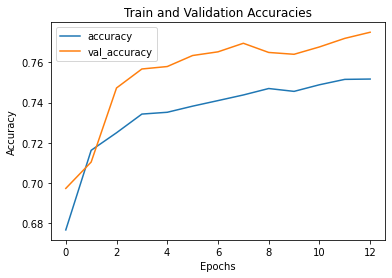

In [198]:
#Let us plot train and validation accuracies
ax = df1[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

The CNN model with optimizer='adam' and loss='binary_crossentropy', achieved an accuracy of 76.28%, which suggests that it has moderate predictive ability for identifying whether a song will become a hit or not.

### 1Dim CNN without CV (2)

In [202]:

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1, input_shape=(14,1))) #1
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2)) #2
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1)) #3
model.add(MaxPooling1D(pool_size=2))#4
model.add(Dropout(0.5))
model.add(GlobalAveragePooling1D()) #10
model.add(Dense(1, activation='sigmoid'))#11
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 12, 32)            128       
                                                                 
 batch_normalization_5 (Batc  (None, 12, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 4, 32)             3104      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 2, 32)            0         
 g1D)                                                            
                                                      

In [203]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [204]:
history_seq = model.fit(x_train_scaled, y_train ,batch_size=128,epochs=15, validation_data=(x_val_scaled,y_val), verbose = 0,callbacks=[early_stopping])


Epoch 11: early stopping


In [205]:
seq_test_accuracy = model.evaluate(x_test_scaled,y_test)[1]*100
print("Accuracy of the model is - " , model.evaluate(x_test_scaled,y_test)[1]*100 , "%")

412/412 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7542
Accuracy of the model is -  75.41618943214417 %


In [206]:
import pandas as pd
df1 = pd.DataFrame(history_seq.history)
df1.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.590518,0.685278,0.661090,0.622263
1,0.554494,0.714795,0.604704,0.746350
2,0.544752,0.728784,0.534546,0.744526
3,0.537421,0.729919,0.508108,0.753954
4,0.534016,0.734947,0.502038,0.756387


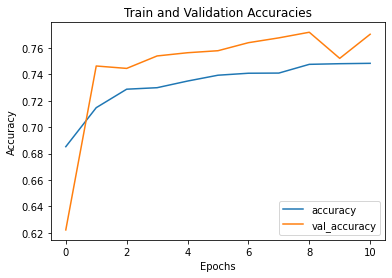

In [207]:
#Let us plot train and validation accuracies
ax = df1[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

The CNN model with optimizer='rmsprop' and loss='binary_crossentropy', achieved an accuracy of 75.42%, which suggests that it has moderate predictive ability for identifying whether a song will become a hit or not.

### 1Dim CNN without CV (3)

In [208]:

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1, input_shape=(14,1))) #1
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2)) #2
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',strides = 1)) #3
model.add(MaxPooling1D(pool_size=2))#4
model.add(Dropout(0.5))
model.add(GlobalAveragePooling1D()) #10
model.add(Dense(1, activation='sigmoid'))#11
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 12, 32)            128       
                                                                 
 batch_normalization_6 (Batc  (None, 12, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 4, 32)             3104      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 2, 32)            0         
 g1D)                                                            
                                                      

In [209]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [210]:
history_seq = model.fit(x_train_scaled, y_train ,
                        batch_size=128,
                        epochs=15, 
                        validation_data=(x_val_scaled,y_val), 
                        verbose = 0,
                        callbacks=[early_stopping])


In [211]:
seq_test_accuracy = model.evaluate(x_test_scaled,y_test)[1]*100
print("Accuracy of the model is - " , model.evaluate(x_test_scaled,y_test)[1]*100 , "%")

412/412 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7306
Accuracy of the model is -  73.05967211723328 %


In [212]:
import pandas as pd
df1 = pd.DataFrame(history_seq.history)
df1.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.654845,0.613672,0.664655,0.698601
1,0.606747,0.669302,0.616818,0.713808
2,0.591084,0.684061,0.568011,0.718370
3,0.587660,0.687508,0.550733,0.724148
4,0.579713,0.693387,0.544599,0.733272


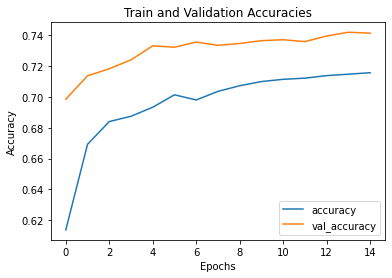

In [213]:
#Let us plot train and validation accuracies
ax = df1[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

The CNN model with optimizer='SGD'and loss='binary_crossentropy', achieved an accuracy of 73.06%, which suggests that it has moderate predictive ability for identifying whether a song will become a hit or not.

### 1Dim CNN without CV (4)

In [215]:
# Set the input and output sizes
input_size = 14 # count of features
output_size = 2 # count of targets
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50 # counts of neurons
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

In [216]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [217]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [218]:

# set the batch size
batch_size = 300
# set a maximum number of training epochs
epochs = 10

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(x_train_scaled, y_train ,
                    batch_size,
                    epochs, 
                    validation_data=(x_val_scaled,y_val), 
                    verbose = 0,
                    callbacks=[early_stopping])

Epoch 10: early stopping


In [219]:
seq_test_accuracy = model.evaluate(x_test_scaled,y_test)[1]*100
print("Accuracy of the model is - " , model.evaluate(x_test_scaled,y_test)[1]*100 , "%")

412/412 [==============================] - 0s 837us/step - loss: 0.4995 - accuracy: 0.7541
Accuracy of the model is -  75.4085898399353 %


In [220]:
import pandas as pd
df1 = pd.DataFrame(history_seq.history)
df1.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.654845,0.613672,0.664655,0.698601
1,0.606747,0.669302,0.616818,0.713808
2,0.591084,0.684061,0.568011,0.718370
3,0.587660,0.687508,0.550733,0.724148
4,0.579713,0.693387,0.544599,0.733272


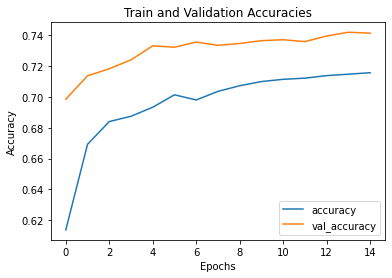

In [221]:
#Let us plot train and validation accuracies
ax = df1[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

The CNN model with optimizer="adam" and loss='sparse_categorical_crossentropy' performed better than previous optimizers and loss functions, achieved an accuracy of 75.41%, which suggests that it has better predictive ability for identifying whether a song will become a hit or not.

### 1Dim CNN with K-Fold Cross Validation

In [222]:
n_folds=3
epochs=15
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    model_history.append(model.fit(x_train_scaled, y_train ,batch_size=128,epochs=15, validation_data=(x_val_scaled,y_val), verbose = 0,callbacks=[early_stopping]))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 14: early stopping


Training on Fold:  2
Epoch 5: early stopping


Training on Fold:  3
Epoch 4: early stopping




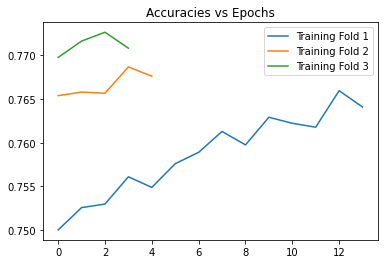

In [223]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

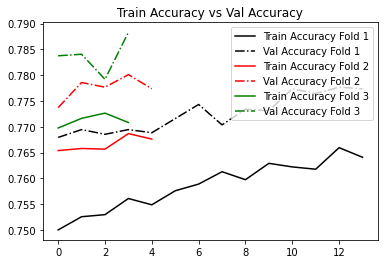

In [224]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

The CNN model with K-Fold Cross Validation performed better than CNN model without cross validation params, achieved an accuracy of 77% (train accuracy) and 78% (validation accuracy), which suggests that it has better predictive ability for identifying whether a song will become a hit or not.

### FEED FORWARD Neural Network (MLP)

In [225]:
df_mlp = df

In [226]:
df_mlp.shape

(41106, 19)

In [227]:
df_mlp.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [228]:
#For dense neural network
def mlp_XY(df_mlp):
    X = df.drop(columns=['artist','track','uri','loudness','target'],axis = 1)
    y = df['target']
    return (X,y)

In [229]:
X,y = mlp_XY(df_mlp)

In [230]:
X.shape, y.shape

((41106, 14), (41106,))

In [231]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler_dnn = MinMaxScaler()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state=18)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.80, random_state=18)

In [232]:
scaler_dnn.fit(X_train)
x_train_scaled = scaler_dnn.transform(X_train)
x_val_scaled = scaler_dnn.transform(X_val)
#now scale xtest using the same scaler
x_test_scaled = scaler_dnn.transform(X_test)

In [233]:
#MLP NN
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [234]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [235]:
history=model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/30
193/193 [==============================] - 1s 3ms/step - loss: 3402.2327 - accuracy: 0.4982 - val_loss: 0.7250 - val_accuracy: 0.5007
Epoch 2/30
193/193 [==============================] - 0s 2ms/step - loss: 82.5599 - accuracy: 0.4994 - val_loss: 0.9804 - val_accuracy: 0.5009
Epoch 3/30
193/193 [==============================] - 0s 2ms/step - loss: 25.1090 - accuracy: 0.4983 - val_loss: 0.7051 - val_accuracy: 0.4971
Epoch 4/30
193/193 [==============================] - 1s 3ms/step - loss: 12.7396 - accuracy: 0.4964 - val_loss: 0.7012 - val_accuracy: 0.4991
Epoch 5/30
193/193 [==============================] - 1s 3ms/step - loss: 7.7667 - accuracy: 0.4966 - val_loss: 0.8582 - val_accuracy: 0.4991
Epoch 6/30
193/193 [==============================] - 0s 2ms/step - loss: 5.4450 - accuracy: 0.4940 - val_loss: 0.7131 - val_accuracy: 0.4991
Epoch 7/30
193/193 [==============================] - 0s 2ms/step - loss: 5.2308 - accuracy: 0.5002 - val_loss: 0.6945 - val_accuracy: 0.4991


In [236]:
import pandas as pd
df = pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.749941,0.501561,0.693153,0.499126
26,0.934631,0.496736,0.693161,0.499126
27,0.759961,0.500710,0.693154,0.499126
28,0.964869,0.495803,0.693151,0.499126
29,0.789282,0.502615,0.693162,0.499126


In [237]:
print("Accuracy of the first model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

412/412 [==============================] - 0s 847us/step - loss: 0.6932 - accuracy: 0.4991
Accuracy of the first model is -  49.91258084774017 %


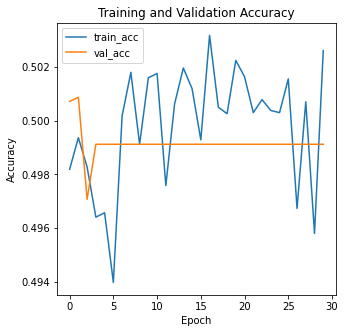

In [238]:
# plot the training and validation accuracy
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

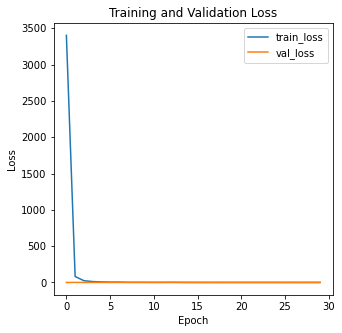

In [239]:
# plot the training and validation loss
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The Multi-Layer Perceptron (MLP) model achieved an accuracy of 49.91%, which suggests that it has poor predictive ability for identifying whether a song will become a hit or not.

### Dense Neural Network

In [21]:
df_dnn = df

In [22]:
df_dnn.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,3817,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,9050,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,6268,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,1837,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,7778,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [29]:
#For dense neural network
def dnn_XY(df_dnn):
    X = df.drop(columns=['artist','track','uri','loudness','target'],axis = 1)
    y = df['target']
    return (X,y)

In [30]:
X_dnn,y_dnn = dnn_XY(df_dnn)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler_dnn = MinMaxScaler()

X_train_dnn, X_val_dnn, y_train_dnn, y_val_dnn = train_test_split(X_dnn, y_dnn, test_size = 0.40, random_state=18)
X_val_dnn, X_test_dnn, y_val_dnn, y_test_dnn = train_test_split(X_val_dnn, y_val_dnn, test_size=0.80, random_state=18)

In [33]:
scaler_dnn.fit(X_train_dnn)
x_train_scaled_dnn = scaler_dnn.transform(X_train_dnn)
x_val_scaled_dnn = scaler_dnn.transform(X_val_dnn)
#now scale xtest using the same scaler
x_test_scaled_dnn = scaler_dnn.transform(X_test_dnn)

In [36]:
model_keras = keras.Sequential([
    keras.layers.Dense(256,activation = 'relu',input_shape=[14]),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')])

2023-04-25 08:21:55.852034: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model_keras.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='accuracy')

In [38]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,057
Trainable params: 45,057
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_keras = model_keras.fit(x_train_scaled_dnn, y_train_dnn ,batch_size=256,epochs=20, validation_data=(x_val_scaled_dnn,y_val_dnn), verbose = 0)


In [40]:
seq_test_accuracy = model_keras.evaluate(x_test_scaled_dnn,y_test_dnn)[1]*100
print("Accuracy of the model is - " , model_keras.evaluate(x_test_scaled_dnn,y_test_dnn)[1]*100 , "%")


412/412 [==============================] - 0s 956us/step - loss: 0.4822 - accuracy: 0.7664
Accuracy of the model is -  76.64006352424622 %


In [41]:
import pandas as pd
df_dnn = pd.DataFrame(history_keras.history)
df_dnn.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.553926,0.716823,0.500039,0.748783
1,0.515405,0.743908,0.488928,0.761253
2,0.508009,0.745611,0.477371,0.764903
3,0.505209,0.749990,0.476097,0.763990
4,0.502524,0.751612,0.471802,0.764903


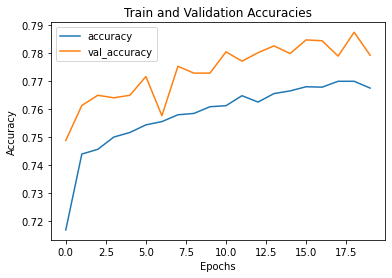

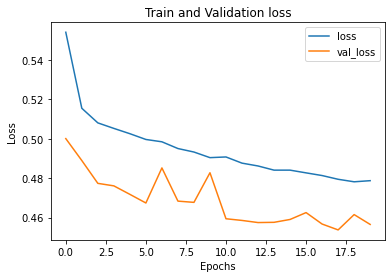

In [42]:
#Let us plot train and validation accuracies
ax = df_dnn[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

#Let us plot train and validation accuracies
ax = df_dnn[['loss','val_loss']].plot(title = "Train and Validation loss")
ax.set(xlabel ="Epochs", ylabel = "Loss")
plt.show()

The Dense Neural Network model achieved an accuracy of 76.64%, which suggests that it has much better predictive ability for identifying whether a song will become a hit or not when compared to the accuracy achieved by the CNN model from above.

### Dense Neural Network with Cross Validation

In [44]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [45]:
n_folds=3
epochs=15
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history_dnn = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    model_history_dnn.append(model_keras.fit(x_train_scaled_dnn, y_train_dnn ,batch_size=128,epochs=15, validation_data=(x_val_scaled_dnn,y_val_dnn), verbose = 0, callbacks=[early_stopping]))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 3: early stopping


Training on Fold:  2
Epoch 4: early stopping


Training on Fold:  3
Epoch 4: early stopping




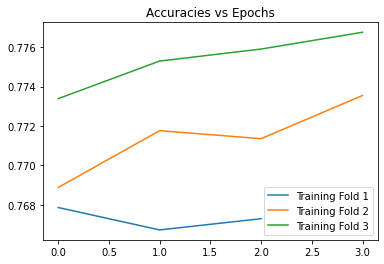

In [46]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history_dnn[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history_dnn[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history_dnn[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

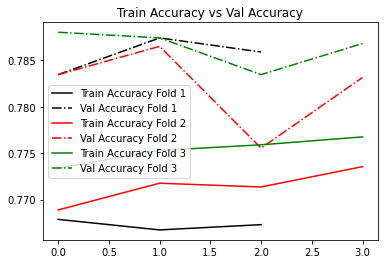

In [47]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history_dnn[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history_dnn[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history_dnn[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history_dnn[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history_dnn[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history_dnn[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

The Dense Neural Network model with Cross Validation params, performed better than CNN model, achieved an accuracy of 77.5% (train accuracy) and 79% (validation accuracy), which suggests that it has better predictive ability for identifying whether a song will become a hit or not.

### Random Forest with cross validation

In [278]:
# Write your answer here (part2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)


params = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11],
    'n_estimators': [10,25,30,50,100,200]
}


cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(classifier_rf, param_grid=params, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid.fit(x_train_scaled, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 11, 'n_estimators': 100}
Best Cross Vlidation Score: 0.7739123064966742


In [283]:
# Write your answer here (part3)

forest = RandomForestClassifier(n_estimators = 100, max_depth = 11)

forest.fit(x_train_scaled,y_train)
y_test_hat_rf = forest.predict(x_val_scaled)
acc = accuracy_score(y_val,y_test_hat_rf, normalize = True) * 100
print("In-Sample Accuracy",acc)
feature_importance = forest.feature_importances_
print("Feature Importance", feature_importance)

In-Sample Accuracy 79.28832116788321
Feature Importance [0.13486577 0.08618542 0.01131503 0.01173863 0.0683091  0.13418061
 0.30281491 0.02410228 0.06627355 0.0263223  0.07065087 0.00882993
 0.0225676  0.03184399]


In [284]:
y_test_hat_rf_ = forest.predict(x_test_scaled)
acc = accuracy_score(y_test,y_test_hat_rf_, normalize = True) * 100
print("In-Sample Accuracy",acc)
feature_importance = forest.feature_importances_
print("Feature Importance",feature_importance)

In-Sample Accuracy 78.27442037248194
Feature Importance [0.13486577 0.08618542 0.01131503 0.01173863 0.0683091  0.13418061
 0.30281491 0.02410228 0.06627355 0.0263223  0.07065087 0.00882993
 0.0225676  0.03184399]


- The Random Forest model with cross-validation achieved accuracy of 78.27%, which suggests that it has moderate to good predictive ability for identifying whether a song will become a hit or not.
- For this dataset, Random Forest Classifier with cross validation params, is considered to be the best model. 

### Feature Importance usinf Shaply

In [285]:
feature_names = df.drop(columns=['artist','track','uri','loudness', 'target'],axis = 1)

In [287]:
feature_names

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.417,0.620,3,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9
1,0.498,0.505,3,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10
2,0.657,0.649,5,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12
3,0.590,0.545,7,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8
4,0.515,0.765,11,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,0.172,0.358,9,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7
6394,0.910,0.366,1,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8
6395,0.719,0.804,10,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7
6396,0.600,0.177,7,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14


In [289]:
f_names = []
for feature in feature_names:
    f_names.append(feature)
f_importance = []
for importance in feature_importance:
    f_importance.append(importance)

In [290]:
values = {}
values['f_importance'] = f_importance
values ['f_names'] = f_names

In [293]:
a = pd.DataFrame(data = values)

In [295]:
a

,f_importance,f_names
0,0.134866,danceability
1,0.086185,energy
2,0.011315,key
3,0.011739,mode
4,0.068309,speechiness
5,0.134181,acousticness
6,0.302815,instrumentalness
7,0.024102,liveness
8,0.066274,valence
9,0.026322,tempo


### Shapley

In [296]:
!pip install shap

     |████████████████████████████████| 436 kB 4.0 MB/s eta 0:00:01


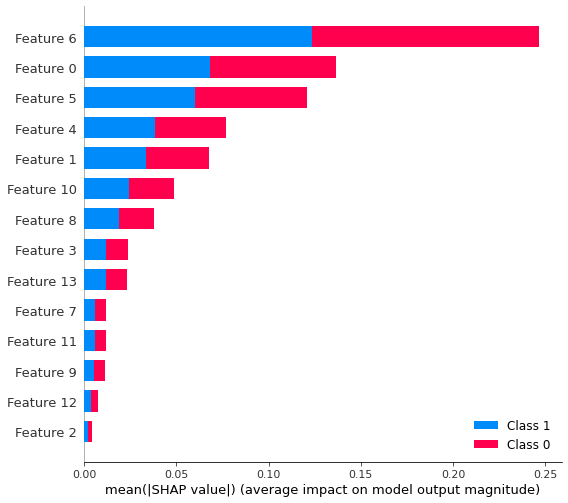

In [298]:
import shap
shap_values = shap.TreeExplainer(forest).shap_values(x_train_scaled)
shap.summary_plot(shap_values, x_train_scaled, plot_type="bar")

In [299]:
a.head(10)

,f_importance,f_names
0,0.134866,danceability
1,0.086185,energy
2,0.011315,key
3,0.011739,mode
4,0.068309,speechiness
5,0.134181,acousticness
6,0.302815,instrumentalness
7,0.024102,liveness
8,0.066274,valence
9,0.026322,tempo


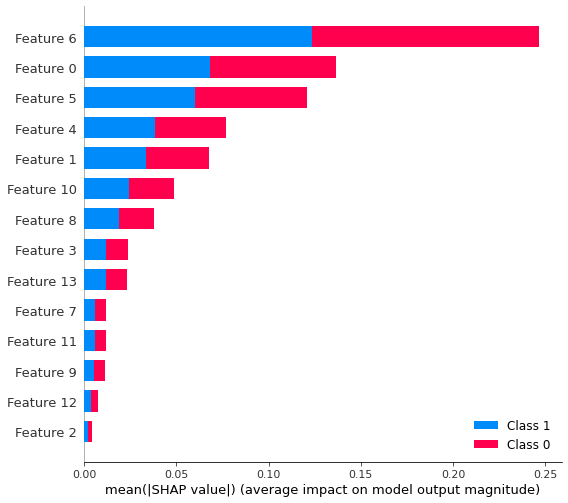

In [300]:
shap.summary_plot(shap_values, x_val_scaled)

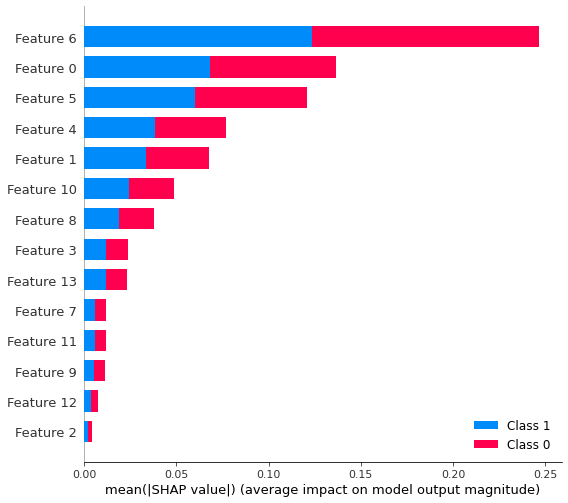

In [301]:
shap.summary_plot(shap_values, x_test_scaled)

In [302]:
for i in feature_importance:
    print(i)

0.13486576646799653
0.08618541956771004
0.011315033959967113
0.011738633070180315
0.0683091027608815
0.13418060699445242
0.3028149148668657
0.024102276742750277
0.06627355190113839
0.026322297860986065
0.07065087003611902
0.008829934216105718
0.022567602527185416
0.0318439890276616


<h2 align='center' style="color: blue;">Conclusion</h2>

Based on the results obtained from evaluating different models on the Spotify Hit Predictor dataset, it appears that the machine laraning model - Random Forest with cross-validation performed the best, with an accuracy of 78.27% and deep learning model - Dense Neural Network with cross-validation performed the best, with an accuracy of 79%. These both models had better predictive ability than the Dummy Classifier, K-Nearest Neighbors, Decision Tree, Support Vector Machines with linear and RBF kernels, Neural Network, CNN, MLP and Gradient Boosting models.

The use of cross-validation helped to reduce overfitting and improve the generalization ability of the Random Forest model. Additionally, the Random Forest model allows for exploration of feature importance (with Shaply implementation) to identify the most important predictors of a hit song.

Random Forest and Dense Neural Networl models (with respect to this dataset) is considered to have a true generalization ability as compared to other models. Based on the results obtained from this evaluation, both these models with cross-validation appears to be the most promising model for predicting whether a song will become a hit or not.